- Sharpe ratio indicates how well an investment performs compared to a risk-free investment, taking into account the additional level of risk involved in holding the stock investment

$\textbf{Sharpe ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of returns<br>

- Sortino ratio is a variation of the Sharpe ratio that considers only downside risk

$\textbf{Sortino ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of the negative returns<br>

- Sharpe ratio is used more to evaluate low-volatility investment portfolios, and the Sortino variation is used more to evaluate high-volatility portfolios (bull markets)

## 0 Imports
---

In [81]:
!pip install plotly

In [82]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1 Load Data
---

In [48]:
df_btc = yf.download('BTC-USD', start = '2018-01-01')[['Close']]
df_btc.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,BTC-USD
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


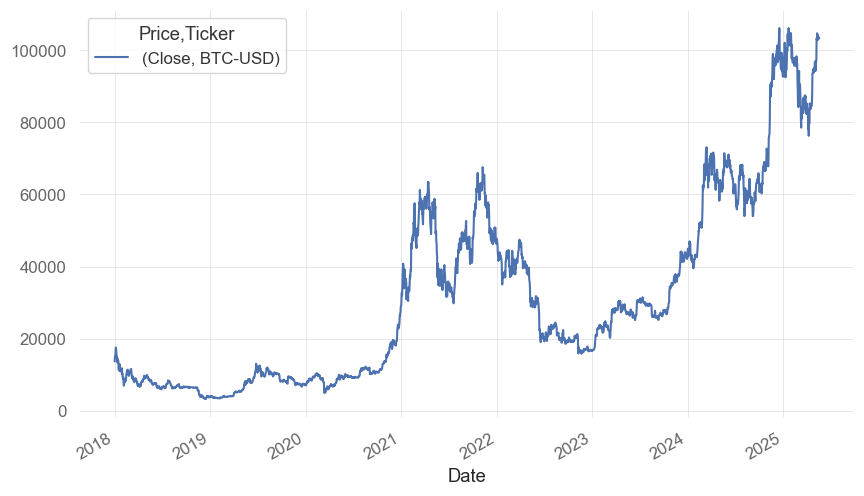

In [49]:
df_btc.plot();

## 2 Metrics Analysis
---

In [50]:
# calculating Sharpe and Sortino ratios considering a risk-free rate 5% per semester
sharpe_qs = pd.Series(qs.stats.rolling_sharpe(df_btc['Close'], rf = 0.05).values.ravel())
sortino_qs = pd.Series(qs.stats.rolling_sortino(df_btc['Close'], rf = 0.05).values.ravel())
sharpe_qs.index = df_btc.index
sortino_qs.index = df_btc.index

quantstats library presents a calculation of the variation of indices using a rolling function (semester ~ 126 days)

### correlation between indices

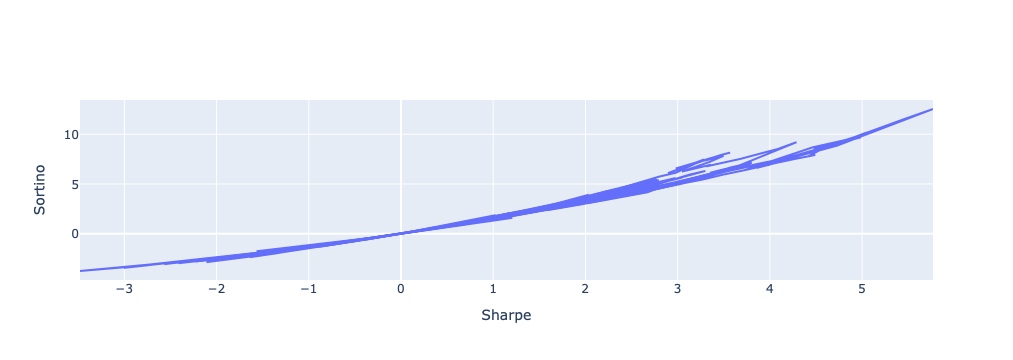

In [73]:
fig_corr = go.Figure()
fig_corr.add_trace({'x': sharpe_qs, 'y': sortino_qs})
fig_corr.update_layout(xaxis_title='Sharpe', yaxis_title='Sortino')

In [74]:
corr, p = stats.pearsonr(sharpe_qs.dropna(), sortino_qs.dropna())
print('pearson-correl r=%.3f' %corr, 'p=%.3f' %p)

pearson-correl r=0.990 p=0.000


In [83]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = sharpe_qs.index, y = sharpe_qs, name = 'Sharpe', line = dict(color = 'blue'), secondary_y = False)
fig.add_trace(go.Scatter(x = sortino_qs.index, y = sortino_qs, name = 'Sortino', line = dict(color = 'red'), secondary_y = False)
fig.add_trace(go.Scatter(x = df_btc.index, y = np.log(df_btc['Close']), name = 'log price BTC-USD', line = dict(color = 'black'), secondary_y = True)

fig.update_yaxes(title_text = 'Risk-adjuste values', secondary_y = False)
fig.update_yaxes(title_text = 'log price BTC-USD', secondary_y = True)
fig.update_layout(title='Sharpe vs Sortino ratios', xaxis_title="Data", margin=dict(l=75, r=20, t=70, b=70))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1600489974.py, line 3)